In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score



In [2]:
df_por = pd.read_csv('/Users/markhurtado/Documents/Flatiron/phase3proj/student-por.csv')
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
df_por.drop(columns = ['Mjob', 'Fjob', 'G1', 'G2'], inplace = True)

In [21]:
df_por['passed'] = df_por['G3'].apply(lambda x: x > 10)

In [22]:
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G3', 'passed'],
      dtype='object')

In [23]:
num_cats = ['age', 'absences', 'failures' ] #Removed G3 for pipeline prediction reasons
nominal_cats = ['school', 'sex', 'address', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', ]
ordinal_cats = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'Medu', 'Fedu', 'studytime', 'traveltime']

In [24]:
numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy= 'mean')), ('numnorm', StandardScaler())])

ordinal_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')), 
    ('ordnorm', StandardScaler())
    ])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')),
    ('onehotnorm', MaxAbsScaler())
])

In [25]:
ct = ColumnTransformer(
    [("ordinal_pipe", ordinal_pipeline, ordinal_cats),
    ("nominal_pipe", nominal_pipeline, nominal_cats),
    ("numeric_pipe", numeric_pipeline, num_cats)]
)

In [26]:
ct

ColumnTransformer(transformers=[('ordinal_pipe',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordnorm',
                                                  StandardScaler())]),
                                 ['famrel', 'freetime', 'goout', 'Dalc', 'Walc',
                                  'health', 'Medu', 'Fedu', 'studytime',
                                  'traveltime']),
                                ('nominal_pipe',
                                 Pipeline(steps=[('onehotimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotenc',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False)),
                              

In [27]:
k_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', KNeighborsClassifier())
])


In [28]:
X = df_por.drop(columns = ['G3', 'passed'])
y = df_por['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 305, stratify = y)

In [29]:
k_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [30]:
y_pred = k_pipe.predict(X_test)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


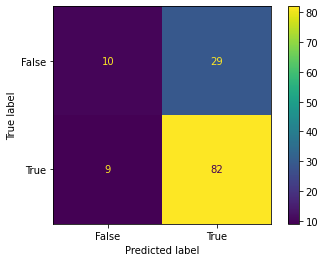

In [31]:
plot_confusion_matrix(k_pipe, X_test, y_test)

In [32]:
accuracy_score(y_test, y_pred)

0.7076923076923077

In [34]:
k_pipe_grid = {'preprocessing__numeric_pipe__numimputer__strategy': ['mean', 'median'], 
                'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
                'model__p': [1, 2, 3, 4]
                }

In [36]:
gridsearch = GridSearchCV(estimator = k_pipe, param_grid= k_pipe_grid, scoring= 'roc_auc')

In [37]:
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ordinal_pipe',
                                                                         Pipeline(steps=[('ordimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordnorm',
                                                                                          StandardScaler())]),
                                                                         ['famrel',
                                                                          'freetime',
                                                                          'goout',
                                                                          'Dalc',
                                                                       

In [40]:
best_model = gridsearch.best_estimator_

In [41]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [43]:
y_pred = best_model.predict(X_test)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


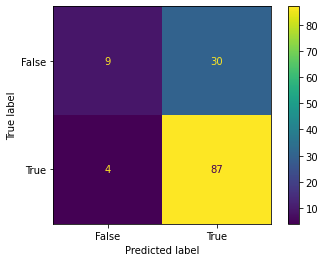

In [44]:
plot_confusion_matrix(best_model,
                      X_test,
                      y_test)